In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import requests, io

from astropy.table import Table
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
from astropy.utils.data import download_file

import pyvo as vo

import warnings
warnings.filterwarnings("ignore", module="astropy.io.votable.*")
warnings.filterwarnings("ignore", module="pyvo.utils.xml.*")

In [9]:
services = vo.regsearch(servicetype='ssa',waveband='uv')
services.to_table()['ivoid','short_name']

ivoid,short_name
object,object
ivo://au.csiro/casda/ssa,CSIRO ASKAP SSA
ivo://mast.stsci/ssap/befs,BEFS
ivo://mast.stsci/ssap/euve,EUVE
ivo://mast.stsci/ssap/fuse,FUSE
ivo://mast.stsci/ssap/hst,HST Spectra
ivo://mast.stsci/ssap/hst/fos,HST.FOS Spectra
ivo://mast.stsci/ssap/hst/ghrs,HST.GHRS Spectra
ivo://mast.stsci/ssap/hst/stis,HST STIS Spectra
ivo://mast.stsci/ssap/hut,HUT


In [68]:
chandra_service = [s for s in services if 'IUE' in s.short_name][0] 
chandra_service.access_url
delori = SkyCoord.from_name("Supernova 1987A")

spec_tables = chandra_service.search(pos=delori,diameter=0.1) 
spec_tables.to_table().show_in_notebook()

NameResolveError: Unable to find coordinates for name 'Magellanic Cloud'

In [51]:
file_name = download_file(spec_tables[0].getdataurl(),cache=True)
hdu_list = fits.open(file_name)

In [52]:
spec_table = Table(hdu_list[1].data)
spec_table

WAVE [2048],FLUX [2048],SIGMA [2048]
float32,float32,float32
815.9551 .. 1877.2511,-3.640503e-15 .. -2.7708813e-15,3.3956376e-16 .. 2.584508e-16


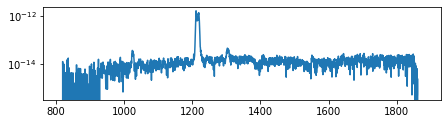

In [53]:
matplotlib.rcParams['figure.figsize'] = (12, 10)

for i in range(len(spec_table)): 
    
    ax = plt.subplot(6,2,i+1)
    pha = plt.plot( spec_table['WAVE'][i],spec_table['FLUX'][i])
    ax.set_yscale('log')
    
   
    
    plt.tight_layout()